In this file, we'll learn to create line graphs to visualize differences in how the life expectancies of different American populations have changed over the past 100 years.

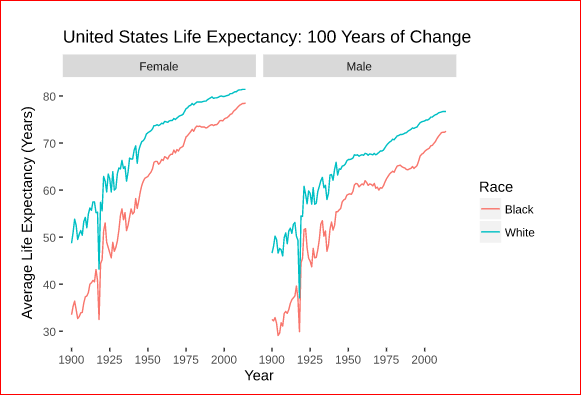

Let's start by importing the data into R. 

`library(readr)
 life_expec <- read_csv("life_expec.csv")`

Due to a combination of biological and social factors, the life expectancy for men is often somewhat lower than it is for women. Let's use the `life_expec` data to explore how life expectancies for men and women have changed over the past 100 years in the United States.

As we explore differences in life expectancy by `sex`, we will need to select a subset of the `life_expec` data that contains observations for the populations of U.S. men and women.

We'll need to filter `life_expec` to retain rows for which values of the `Sex` variable are either `Female` or `Male` and, since we are not yet investigating life expectancies for different races, values of `Race` are `All Races`.

**Task**

* Create a new data frame, `life_expec_sex`, containing only rows for which the `Sex` variable has the value "Female" or "Male" and the `Race` variable has the value "All Races."

**Answer**

`life_expec_sex <- life_expec %>% filter(Sex != "Both Sexes" & Race == "All Races")`

The new `life_expec_sex` data frame we created contains life expectancy data for men and women.

One way to compare the changes over time for the life expectancies of the two populations is to create a separate line graph for each.

If we create a line graph of the data using code similar to what we wrote in the previous file:

`ggplot(data = life_expec_sex, aes(x = Year, y = Avg_Life_Expec)) + geom_line()`

The graph generated has two observations for each year: One for men and one for women. All observations are connected by a line, making the line graph appear to depict year-to-year fluxtuations in life expectancy instead of data for two separate populations:

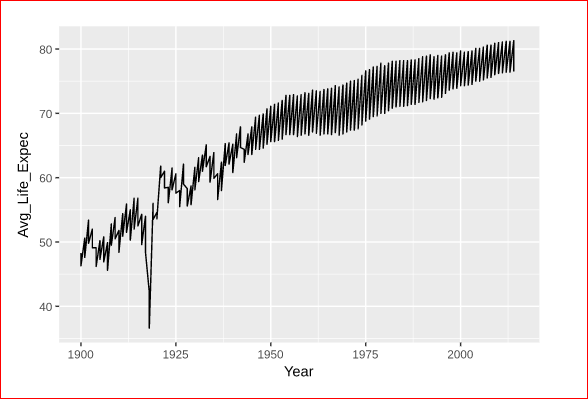

One way to improve the clarity of this line graph is to plot life expectancy data for men and women on different axes using multiple graph panels.

We can create line graphs on multiple, adjacent panels from the same data set by adding a new layer to our graph: `facet_wrap()`.

The `facet_wrap()` function splits data into subplots based on values of a variable in our data set.

By default, adding a layer to our graph using `facet_wrap(~Variable)` creates two panels side by side, as shown in the graph above. However, we can specify alternative arrangements of the panels using the arguments `ncol =` or `nrow =` within `facet_wrap()`.

The `ncol` and `nrow` arguments allow us to specify the number of rows or columns of panels in our visualization. If we wrote the following code:

`ggplot(data = life_expec_sex, aes(x = Year, y = Avg_Life_Expec)) + geom_line() + facet_wrap(~Sex, ncol = 2)`

However, we could create a graph with panels stacked one on top of the other by specifying either `ncol = 1` or `nrow = 2`.

**Task**

* Let's visualize U.S. women's and men's life expectancies on separate panels so we can compare how they have changed over time.

**Answer**

`ggplot(data = life_expec_sex) + aes(x = Year, y = Avg_Life_Expec) + facet_wrap(~ Sex, ncol = 1) + geom_line()`

Let's take a look at the graph we created:

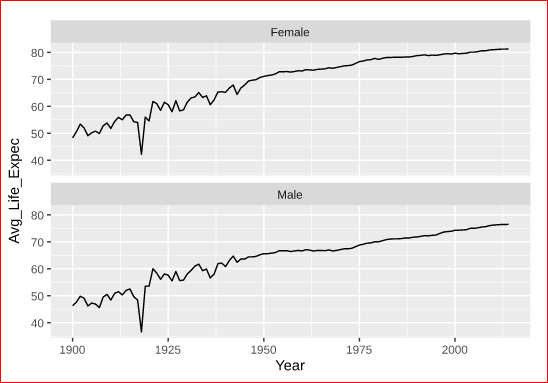

From this visualization, it's clear that women's and men's life expectancies have followed some similar patterns over the past century. For example, both display a sharp dip around the time of the 1918 flu pandemic.

Comparing the life expectancy changes over time depicted in the two panels of this graph is easier than looking at a table of data, but it's still difficult to understand whether there are differences in men's and women's life expectancies.

This visualization can be improved by plotting men's and women's life expectancy over time on the same axis instead of on two separate ones.

Instead of adding a layer to the graph to create two separate panels, we can specify that we want to plot multiple lines within the `aes()` layer, where we mapped the data to the axes.

Although up until now we have only introduced the axis arguments that can be used to define x and y variables on a two-dimensional graph, the `aes()` layer can also be used to map additional variables to our graph using aesthetic properties like color, shape, and size.

For example, you can plot men's and women's life expectancies on the same set of axes and differentiate them by using different styles of lines:

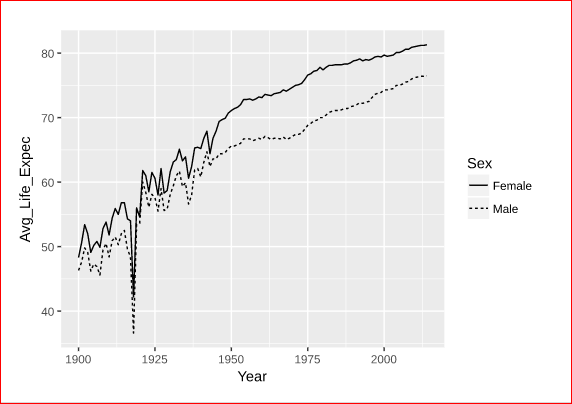

To create a line graph with different values of the Sex variable shown using different styles of lines, we'd use the syntax `lty = Sex`. The argument `lty` stands for "line type":

`ggplot(data = life_expec_sex) + aes(x = Year, y = Avg_Life_Expec, lty = Sex) + geom_line()`

In addition to line type, we can also differentiate lines for different values of a variable using color by using the argument `color =`.

In the graph above, notice there is a box containing information about which line type matches which values of the `Sex` variable. This is referred to as a **legend**. Chart legends contain a list of variables that appear in a graph and an example of their appearance. Legends are important to include so the person looking at our graph understands it. Graphs we create using `ggplot2` include a legend by default.

`ggplot(data = life_expec_sex) + aes(x = Year, y = Avg_Life_Expec, color = Sex) + geom_line()`

As we look at the new graph we created, we can see the differences in changes in men's and women's life expectancies over time more clearly than we could when we plotted them on different panels:

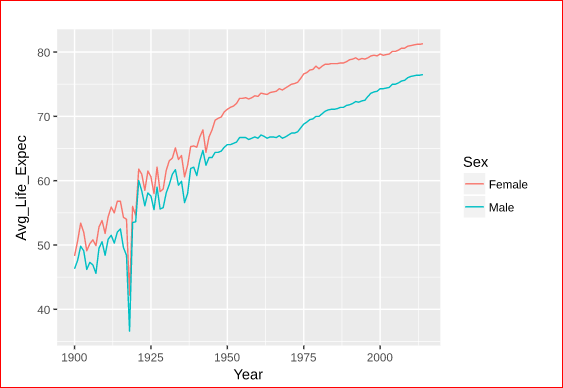

Although life expectancies for U.S. men and women followed similar patterns over the past 100 years, in general, women have tended to live longer.

Relatively recently, since about 1950, life expectancies for men and women have steadily and gradually increased.

Before 1950, though, life expectancies appear to have fluctuated quite a bit from year to year. Why might this be?

When we want to hone in on an interesting subset of our data for further investigation, one way to do so is to set scale limits. Changing the **scale limits** changes the range of our axes so we can display only a portion of our data.

For example, let's say we wanted to create a graph displaying only the 1918 dip in life expectancy due to influenza

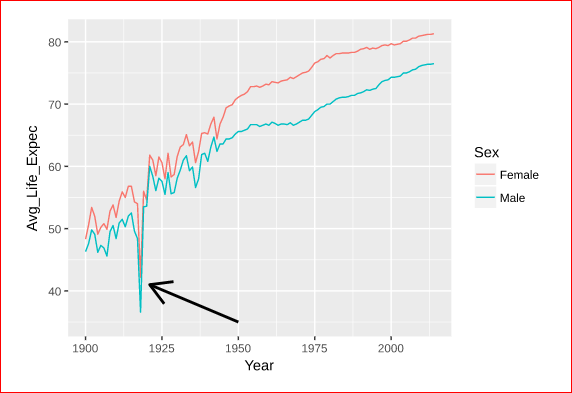

We could do so by changing the scale limits to produce this graph:

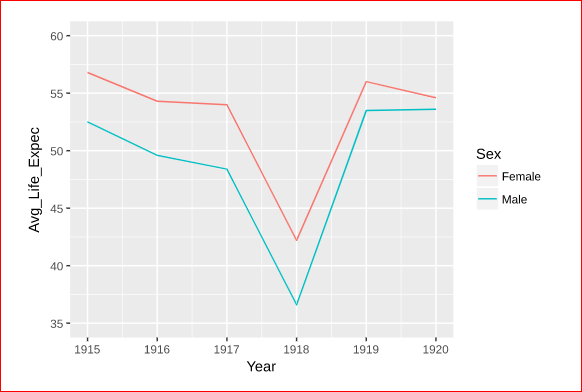

In graph above, the x-axis years range from 1915 to 1920, and the y-axis life expectancies range from 35 to 60 years old. We have zoomed in on this portion of the graph by writing the following code to change the scale limits:

`ggplot(data = life_expec_sex, 
  aes(x = Year, y = Avg_Life_Expec, color = Sex)) +
  geom_line() +
  xlim(1915, 1920) +
  ylim(35, 60)`

Looking at the graph of life expectancies for the years 1915 to 1920 allows you to clearly visualize the devastating effect that the flu pandemic had on life expectancies.

**Task**

* Add a new layer to the line graph of men's and women's life expectancies to hone in on the years between 1900 and 1950.

**Answer**

`ggplot(life_expec_sex) + 
  aes(x = Year, y = Avg_Life_Expec, color = Sex) + 
  geom_line() + 
  xlim(1900,1950)`

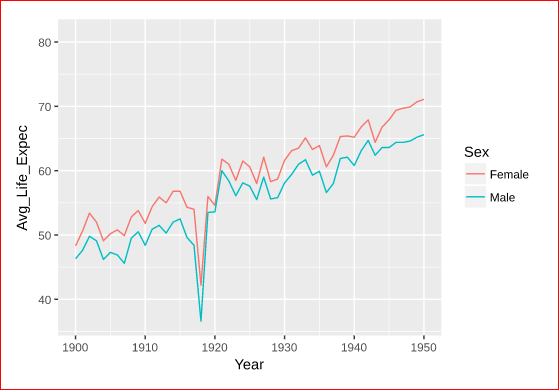

This visualization can allow us to take a closer look at the year-to-year variability in life expectancy during the first half of the twentieth century.

What do you think could be some potential causes? Perhaps a greater impact of infectious diseases prior to medical advances such as vaccines for polio, measles, and influenza? This could be an interesting topic to study, and demonstrates some of the types of questions that arise when we visualize data graphically instead of looking at it in tabular form.

We have now investigated differences in life expectancy between men and women, and we can taken an even more granular view of the available data by looking at differences between life expectancies of black and white Americans.

To do this, we will need to use a different subset of data from the `life_expec` data frame:

* Values of `Sex` that are either "Male" or "Female"
* Values of `Race` that are either "Black" or "White"

Put another way, we will want to exclude averaged data:

* Values of `Sex` that are "Both Sexes"
* Values of `Race` that are "All Races"

Let's filter the `life_expec` data frame to retain only values of the `Sex` and `Race` variables that we'll include in our visualization of U.S. life expectancy by race and sex.

**Task**

* Create a new data frame, `life_expec_sex_race`, that contains values of `Sex` that are either "Male" or "Female" and values of `Race` that are either "Black" or "White."

**Answer**

`life_expec_sex_race <- life_expec %>% 
filter ((Sex == "Female" | Sex == "Male") & (Race == "Black" | Race == "White"))`

Notice there are four observations for each year: Black women, black men, white women, and white men. This means we have four lines to plot.

What is the best way to present line graphs of these data?

One method is to plot four lines on a single set of axes.

To create a line graph with a line for each combination of Sex and Race variable values, we can specify multiple aesthetic parameters within the `aes()` layer.

For example, to create a graph in which lines representing life expectancies are

* Different colors for populations of different sexes
* Different line styles for populations of different races

`ggplot(data = life_expec_sex_race, 
  aes(x = Year, y = Avg_Life_Expec, color = Sex, lty = Race)) +
  geom_line()`

The resulting graph has four lines that represent:

* Black women
* Black men
* White women
* White men

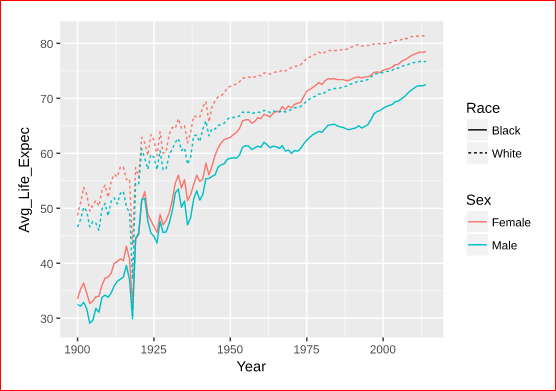

So far, we have used the default colors and line types when working in the `aes()` layer. However, `ggplot2` allows us to customize these arguments extensively:

* This [guide](http://www.stat.columbia.edu/~tzheng/files/Rcolor.pdf) contains R colors labeled with names you can use to reference them.
* Here is a [guide](http://www.sthda.com/english/wiki/line-types-in-r-lty) to line types in R.

To change the two colors we used in the graph above to represent men and women, we'd add a layer called `scale_color_manual()`.


`ggplot(data = life_expec_sex_race, 
  aes(x = Year, y = Avg_Life_Expec, color = Sex, lty = Race)) +
  geom_line() +
  scale_color_manual(values = c("magenta", "orange"))`

The resulting graph represents women's life expectancies with magenta lines and men's life expectancies with orange lines.

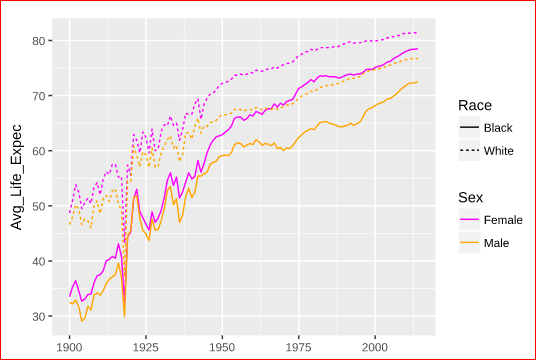

To change the line types representing black and white Americans' life expectancies, you'll need to add another layer: `scale_linetype_manual()`. To change the line types in the graph to "longdash" and "dotdash", we would write:

`ggplot(data = life_expec_sex_race, 
  aes(x = Year, y = Avg_Life_Expec, color = Sex, lty = Race)) +
  geom_line() +
  scale_color_manual(values = c("magenta", "orange")) +
  scale_linetype_manual(values = c("longdash", "dotdash"))`

The resulting graph represents black and white Americans' life expectancies with lines of different dash patterns.

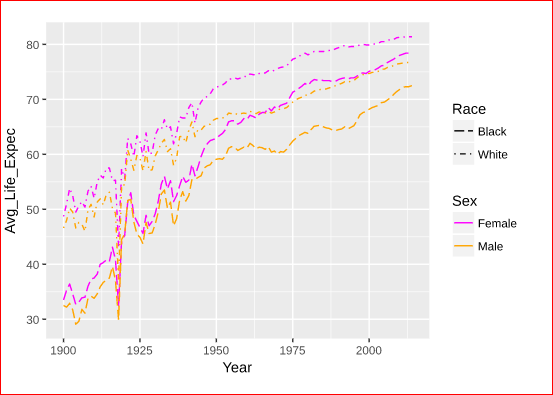

When creating line graphs, it's important that the graph allows the viewer to clearly see what we, its creator, are trying to convey. In the graph example where values of the `Race` variable are both represented by dashed lines, it's difficult to see differences between the populations. It would have been better in this case to use line types that are more distinct.

**Task**

* let's practice using different line type and color combinations to visualize life expectancy data.

**Answer**

`ggplot(life_expec_sex_race) + 
  aes(x = Year, y = Avg_Life_Expec, color = Sex, lty = Race) +
  geom_line() +
  scale_color_manual(values = c("darkgreen", "darkorchid")) +
  scale_linetype_manual(values = c(1,4))`

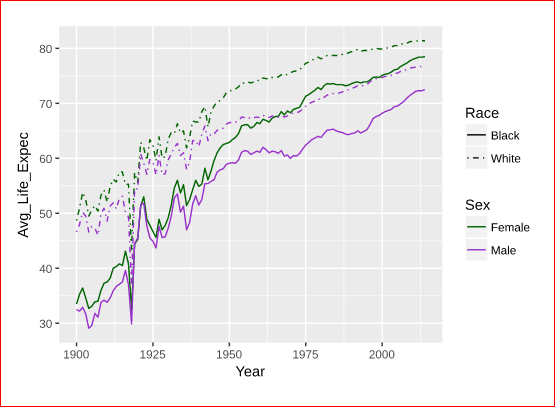

As we noted earlier, life expectancies for men tend to be lower than those for women.

Breaking the data down further into populations of black and white Americans reveals that, within each population, the pattern of women living longer than men holds true.

However, it's clear from the graph that in general, white women live longer than black women, and white men live longer than black men. This pattern is likely due to socioeconomic inequality in the U.S., which negatively impacts the lives of black Americans.

It is also interesting to note that while life expectancies for white women and men have generally not fluctuated much since about 1950, life expectancies for black women and men continue to fluctuate from year to year.

We can learn a lot by looking at the graph we created. However, it can make some parts of the graph, such as the 1918 life expectancy dip, difficult to see clearly.

Let's try another way to present this data that involves using both the `facet_wrap()` and `aes()` layers.

We can create a graph with separate panels for the `Race` variable and two lines, one for each value of the `Sex` variable, per panel:

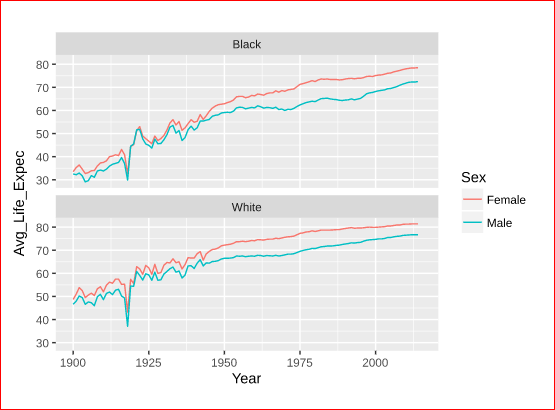

The code we would write to create this graph is:

`ggplot(data = life_expec_sex_race, 
  aes(x = Year, y = Avg_Life_Expec, color = Sex)) +
  geom_line() + 
  facet_wrap(~Race, ncol = 1)`

We can also choose to create a graph with separate panels for values of the `Sex` variable and two lines, one for each value of the `Race` variable, per panel.

The way we choose to graph our data ultimately depends on the questions we are trying to answer, and often requires some trial and error.

In the case of this data set, if we were most interested in the question of how men's and women's life expectancy changes compare, we may choose to create plot panels for the `Race` variable and graph men's and women's life expectancies on the same axes to allow for more nuanced comparisons.

If we were more interested in the question of how black and white Americans' life expectancy changes compare, we may create a graph with the opposite configuration.

Most commonly, we will try both approaches, and select the graph that best allows us to visualize trends in our data. The consistent, systematic syntax of `ggplot2` will allow us to create multiple graphs as part of our workflow without taking up too much of our time.

**Task**

* let's create a graph that incorporates the skills we've learned so far 

**Answer**

`ggplot(data = life_expec_sex_race) + 
  aes(x = Year, y = Avg_Life_Expec, lty = Race) +
  geom_line() + 
  scale_linetype_manual(values = c(1,4)) +
  facet_wrap(~Sex, ncol = 2) + 
  labs(title = "United States Life Expectancy: 100 Years of Change", y = "Average Life Expectancy (Years)") +
  theme(panel.background = element_rect(fill = "white"))`

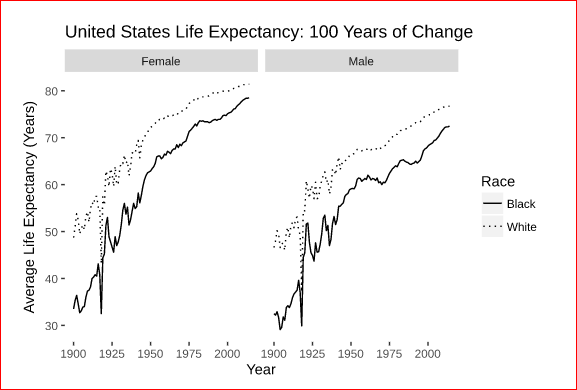